## Core Workflow: Query feature layers from ArcGIS online 
Purpose: Load feature layers from ArcGIS online into a pandas dataframe and run meaningful queries
<br>



### Display Feature Layer

In [1]:
from IPython.display import display
import arcgis
from arcgis.gis import GIS

import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import os
import numpy as np

import warnings
warnings.filterwarnings('ignore')


In [2]:
# connect to your GIS without signing in
gis = GIS("https://www.arcgis.com")

In [3]:
webmap_search = gis.content.search("pred_LA_2014_sub", item_type="Feature Layer", max_items = 100,outside_org=True)
webmap_search

[<Item title:"pred_la_2014_sub" type:Feature Layer Collection owner:trashid_wri>]

In [4]:
LA_map_item = webmap_search[0]
LA_map_item

<Item title:"pred_la_2014_sub" type:Feature Layer Collection owner:trashid_wri>

In [5]:
LA_layer = LA_map_item.layers[0]

In [6]:
type(LA_layer)

arcgis.features.layer.FeatureLayer

## Query the features
#### Let us query the features on this layer

In [7]:
#query the fields in eq_fl layer
for field in LA_layer.properties.fields:
    print(field['name'])

field_1
albedo
total_pixe
long
lat
ObjectId
Shape__Area
Shape__Length


In [8]:
# query this feature collection to get a data as a feature set
# in this case, find all roofs with low albedo 
LA_ft_set = LA_layer.query(where='albedo<=0.3',out_fields='albedo') 

In [9]:
LA_ft_set

<FeatureSet> 18965 features

### The `sdf` property of `FeatureSet` class is a powerful way to visualize all the features as a pandas dataframe table.


In [10]:
# Load the feature set into a pandas dataframe
df = LA_ft_set.sdf
df.head()

,ObjectId,SHAPE,albedo
0,2,"{""rings"": [[[-13162362.8543938, 4032050.706034...",0.141204
1,3,"{""rings"": [[[-13165041.2341534, 4037012.796113...",0.180229
2,4,"{""rings"": [[[-13160623.4889514, 4034572.437788...",0.234217
3,5,"{""rings"": [[[-13165041.2341534, 4037012.796113...",0.180229
4,6,"{""rings"": [[[-13162838.9060994, 4034200.466273...",0.151054


In [11]:
# find the count of small and large roofs 
cnt_small_roofs = LA_layer.query(where='Shape__Area<=500', return_count_only=True)
cnt_large_roofs = LA_layer.query(where='Shape__Area>5000',return_count_only=True)

print('number of small roofs = ', cnt_small_roofs)
print('number of large roofs = ', cnt_large_roofs)

number of small roofs =  13477
number of large roofs =  562


In [12]:
# find small roofs and store them as a pandas df

small_roofs = LA_layer.query(where='Shape__Area<500',out_fields='albedo')

sm_rf_df = small_roofs.sdf
sm_rf_df.head()

,ObjectId,SHAPE,albedo
0,1,"{""rings"": [[[-13162097.3810506, 4037246.899478...",0.553825
1,2,"{""rings"": [[[-13162362.8543938, 4032050.706034...",0.141204
2,3,"{""rings"": [[[-13165041.2341534, 4037012.796113...",0.180229
3,5,"{""rings"": [[[-13165041.2341534, 4037012.796113...",0.180229
4,6,"{""rings"": [[[-13162838.9060994, 4034200.466273...",0.151054


### Create a histogram for small roofs

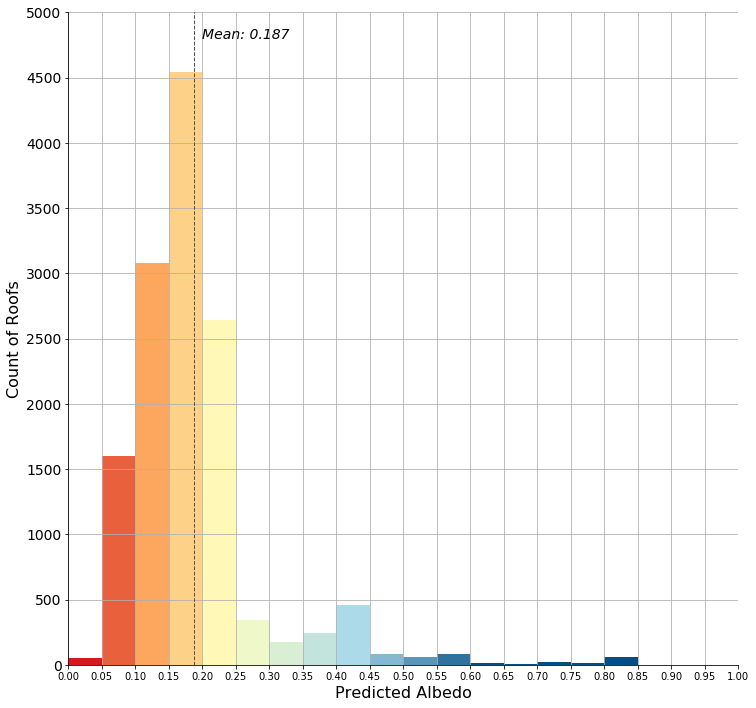

In [19]:
sm_rf_df['ScoredLabels']=sm_rf_df['albedo']
x = sm_rf_df.ScoredLabels.dropna()
plt.figure(figsize=(12,12))
N, bins, patches = plt.hist(x,bins=[0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 
                                0.8, 0.85,0.9,0.95,1])

cmap = plt.get_cmap('jet')
low = cmap(0.5)
medium =cmap(0.2)
high = cmap(0.7)


for i in range(0,1):
    patches[i].set_facecolor('#d7191c')
for i in range(1,2):
    patches[i].set_facecolor('#e9603d')
for i in range(2,3):
    patches[i].set_facecolor('#fca75d')
for i in range(3,4):
    patches[i].set_facecolor('#fed189')
for i in range(4,5):
    patches[i].set_facecolor('#fff8b6')
for i in range(5,6):
    patches[i].set_facecolor('#eef8c8')
for i in range(6,7):
    patches[i].set_facecolor('#d9eed3')
for i in range(7,8):
    patches[i].set_facecolor('#c3e4dd')
for i in range(8,9):
    patches[i].set_facecolor('#addae8')
for i in range(9,10):
    patches[i].set_facecolor('#85b9d2')
for i in range(10,11):
    patches[i].set_facecolor('#5a96b8')
for i in range(11,12):
    patches[i].set_facecolor('#2f729d')
for i in range(12,18):
    patches[i].set_facecolor('#054e83')

plt.grid()    
plt.axis([0, 1, 0, 5000])
plt.xlabel("Predicted Albedo", fontsize=16)  
plt.ylabel("Count of Roofs", fontsize=16)
plt.axvline(x.mean(), color='#544f50', linestyle='dashed', linewidth=1)
plt.xticks(np.arange(0, 1.01, 0.05),fontsize=10)  
plt.yticks(np.arange(0, 5500, 500),fontsize=14)
plt.text(0.2, 4800, "Mean: " + str(round(sm_rf_df.albedo.mean(),4)), style='italic',fontsize=14)
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

plt.show()


-----------------------------------------------------